### Try-it 8.1: The "Best" Model

This module was all about regression and using Python's scikitlearn library to build regression models.  Below, a dataset related to real estate prices in California is given. While many of the assignments you have built and evaluated different models, it is important to spend some time interpreting the resulting "best" model.  


Your goal is to build a regression model to predict the price of a house in California.  After doing so, you are to *interpret* the model.  There are many strategies for doing so, including some built in methods from scikitlearn.  One example is `permutation_importance`.  Permutation feature importance is a strategy for inspecting a model and its features importance.  

Take a look at the user guide for `permutation_importance` [here](https://scikit-learn.org/stable/modules/permutation_importance.html).  Use  the `sklearn.inspection` modules implementation of `permutation_importance` to investigate the importance of different features to your regression models.  Share these results on the discussion board.

In [1]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
cali = pd.read_csv('data/housing.csv')

In [4]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
cali.info()

In [ ]:
cali.shape

In [7]:
cali['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# EDA

In [8]:
#check any missing data
cali.isnull().sum()/cali.shape[0]*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

The total_bedrooms has a 207 or 1.002709% of missing data

In [ ]:
cali['total_bedrooms'].fillna(cali['total_bedrooms'].median(skipna=True),inplace=True)

In [10]:
cali.isnull().sum()/cali.shape[0]*100

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

# Data Visualization

<Figure size 720x720 with 0 Axes>

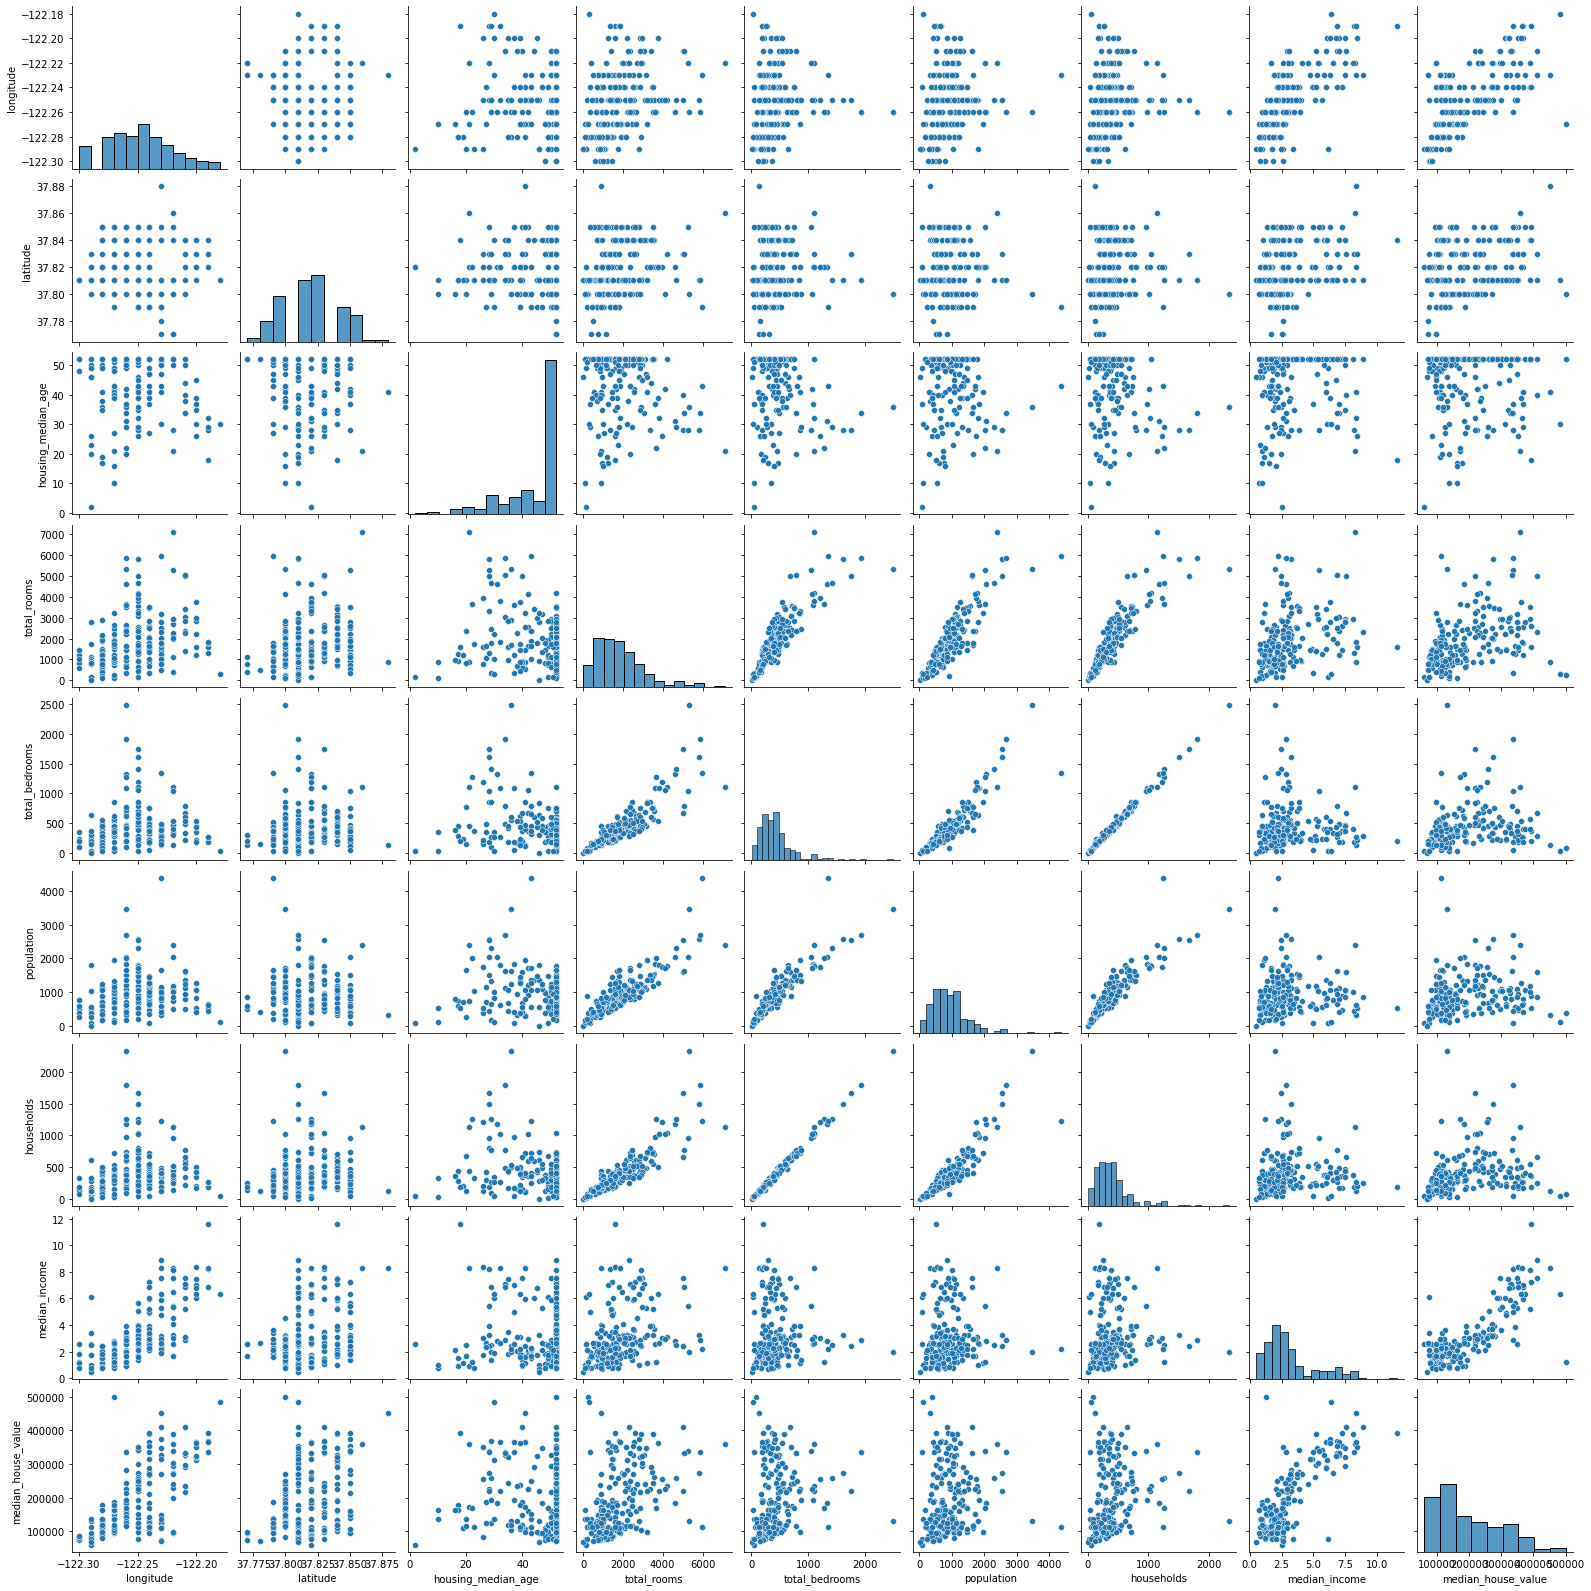

In [11]:
fig=plt.figure(figsize=(10,10))
sns.pairplot(cali.iloc[:200,:])

In [12]:
cali.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

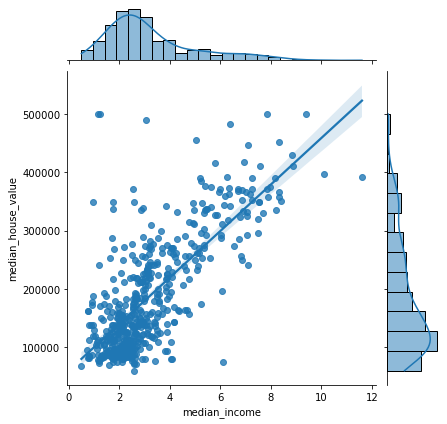

In [13]:
sns.jointplot(data=cali.iloc[:500,:], x='median_income', y='median_house_value', kind='reg')

In [14]:
cali_corr=cali.iloc[:500,:].corr()
cali_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.797370,-0.234744,-0.024217,-0.124752,0.004222,-0.122808,0.172878,-0.141148
latitude,-0.797370,1.000000,0.242748,0.205521,0.148440,0.021011,0.165250,0.275340,0.567696
housing_median_age,-0.234744,0.242748,1.000000,-0.114391,-0.179132,-0.130920,-0.171711,0.000833,0.046072
total_rooms,-0.024217,0.205521,-0.114391,1.000000,0.868822,0.815736,0.878115,0.252047,0.350779
total_bedrooms,-0.124752,0.148440,-0.179132,0.868822,1.000000,0.868490,0.994362,-0.067765,0.143627
population,0.004222,0.021011,-0.130920,0.815736,0.868490,1.000000,0.868599,-0.096629,0.057044
households,-0.122808,0.165250,-0.171711,0.878115,0.994362,0.868599,1.000000,-0.038833,0.172961
median_income,0.172878,0.275340,0.000833,0.252047,-0.067765,-0.096629,-0.038833,1.000000,0.740523
median_house_value,-0.141148,0.567696,0.046072,0.350779,0.143627,0.057044,0.172961,0.740523,1.000000


<AxesSubplot:>

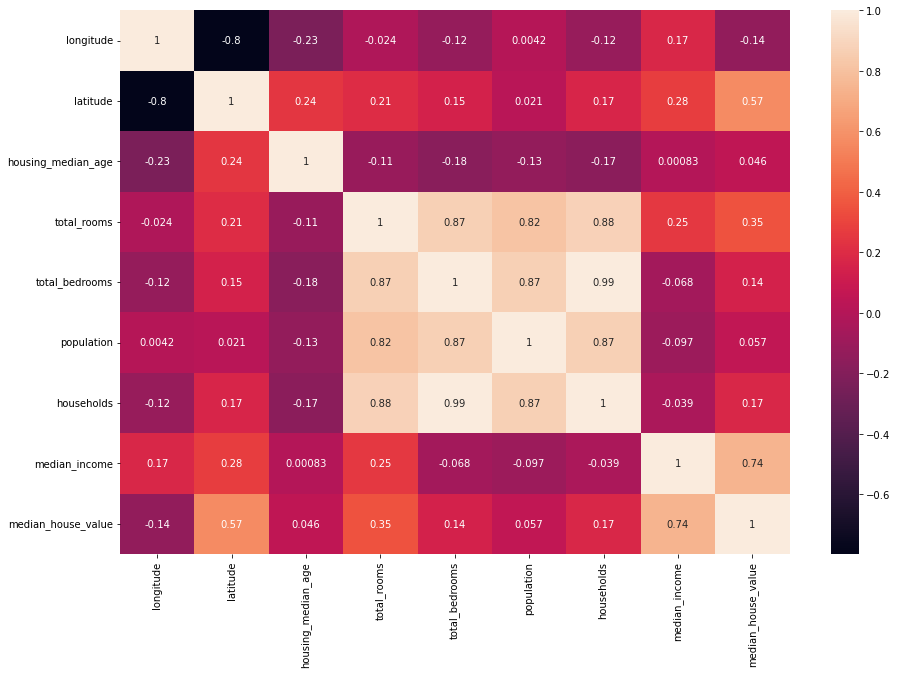

In [15]:
fig=plt.figure(figsize=(15,10))
sns.heatmap(cali_corr, annot=True)

# Prepare the data

In [16]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
X=cali.drop(['median_house_value'], axis=1)
y=cali['median_house_value']
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [18]:
#Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# With out Scaling the data First

In [ ]:
#create a pipe
for i in range(1,3):
    transformer=make_column_transformer(
                                      (PolynomialFeatures(degree = i), make_column_selector(dtype_include=np.number)),
                                      (OneHotEncoder(drop = 'if_binary'), ['ocean_proximity']),
                                       remainder='passthrough')
    pipe = Pipeline([('transformer', transformer), ('linreg', LinearRegression())])

In [ ]:
# on the trained data
pipe.fit(X_train,y_train)

In [ ]:
y_train_pred=pipe.predict(X_train)
y_train_pred

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE_train=mean_squared_error(y_train,y_train_pred)
MSE_train

In [ ]:
pipe.score(X_train,y_train)

In [ ]:
#on the test data
y_test_pred=pipe.predict(X_test)

In [ ]:
MSE_test=mean_squared_error(y_test,y_test_pred)
MSE_test

In [ ]:
pipe.score(X_test,y_test)

In [ ]:
r = permutation_importance(pipe, X_test, y_test,n_repeats=3,random_state=42)

In [ ]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{cali.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

# Scaling the data First

In [ ]:
#create a pipe
for i in range(1,11):
    transformer_scaler=make_column_transformer(
                                       (StandardScaler()),
                                      (PolynomialFeatures(degree = i), make_column_selector(dtype_include=np.number)),
                                      (OneHotEncoder(drop = 'if_binary'), ['ocean_proximity']),
                                       remainder='passthrough')
    pipe_scaler = Pipeline([('transformer_scaler', transformer_scaler), ('linreg', LinearRegression())])
    pipe_scaler.fit(X_train,y_train)

In [ ]:
#Calculating train_MSE and Test_MSE
y_train_pred=pipe_scaler.predict(X_train)
y_test_pred=pipe_scaler.predict(X_test)
train_mse=mean_squared_error(y_train,y_train_pred)
test_mse=mean_squared_error(y_test,y_test_pred)

train_score=pipe.score(X_train,y_train)
test_score=pipe.score(X_test,y_test)

print(f'train_mse:{train_mse}')
print(f'test_mse:{test_mse}')

print(f'train_score:{train_score}')
print(f'test_score:{test_score}')

In [ ]:
def get_test_data(k):
    pipe=Pipeline(
                steps=[('poly_features',PolynomialFeatures(degree=k)),
                       ('lm',LinearRegression())
                      
                      
                      ]
                  )
    pipe.fit(X_train,y_train)
    return mean_squared_error(pipe.predict(X_test),y_test)

In [ ]:
ks=np.array(range(1,11))
MSES_train=[get_test_data(k) for k in ks]

MSES=pd.DataFrame({'k':ks,'MSES_train':MSES_train,'MSES_test':MSES_test})